In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
import sys
import hist
from hist import Hist
sys.path.append("/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMeAnalysis/python_analysis/analysisTools/")
from analysisTools import loadSchema
from analysisTools import fileAnalyzer
from analysisTools import deltaPhi
import analysisSubroutines as routines
import importlib
import time
import numba as nb
import vector

In [2]:
events = loadSchema("root://cmseos.fnal.gov//store/group/lpcmetx/iDMe//Samples/Ntuples/signal/2018/Mchi-10p5_dMchi-1p0/ctau-10/ntuples_Mchi-10p5_dMchi-1p0_ctau-10_02.root")
routines.selectGoodElesAndVertices(events)
events.__setitem__("nGoodVtx",ak.count(events.good_vtx.vxy,axis=1))
events = events[events.nGoodVtx > 0]
# pre-computing quantities for cuts
events.__setitem__("JetMETdPhi",deltaPhi(events.PFJet.corrPhi,events.PFMET.phi))
routines.selectBestVertex(events)
v = events.sel_vtx
et = events.PFMET
events.__setitem__("VtxMETdPhi",np.abs(deltaPhi(events.sel_vtx.phi,events.PFMET.phi)))
q1 = v.pt
q2 = v.m
q3 = v.pt/v.m
q4 = v.m/v.pt
q5 = 1.0/v.pt
q6 = 1.0/v.m
qs_sig = [q1,q2,q3,q4,q5,q6]
v_sig = v

In [7]:
events.sel_vtx.e1.PFIso8

<Array [63.1, 74.1, 76.3, ... 129, 42.5, 109] type='2006 * ?float32'>

In [23]:
events2 = loadSchema("root://cmseos.fnal.gov//store/group/lpcmetx/iDMe//Samples/Ntuples/background/2018/QCD_TuneCP5_PSWeights/QCD_HT1000to1500/QCD_HT1000to1500_TuneCP5_PSWeights_13TeV-madgraph-pythia8/crab_iDMe_QCD_HT1000to1500_2023_01_23-09_29/230123_153016/0000/QCD_HT1000to1500_470.root")
routines.selectGoodElesAndVertices(events2)
events2.__setitem__("nGoodVtx",ak.count(events2.good_vtx.vxy,axis=1))
events2 = events2[events2.nGoodVtx > 0]
# pre-computing quantities for cuts
events2.__setitem__("JetMETdPhi",deltaPhi(events2.PFJet.corrPhi,events2.PFMET.phi))
routines.selectBestVertex(events2)
vb = events2.sel_vtx
events2.__setitem__("VtxMETdPhi",np.abs(deltaPhi(events2.sel_vtx.phi,events2.PFMET.phi)))
q1 = vb.pt
q2 = vb.m
q3 = vb.pt/vb.m
q4 = vb.m/vb.pt
q5 = 1.0/vb.pt
q6 = 1.0/vb.m
qs_bkg = [q1,q2,q3,q4,q5,q6]
vs_bkg = vb

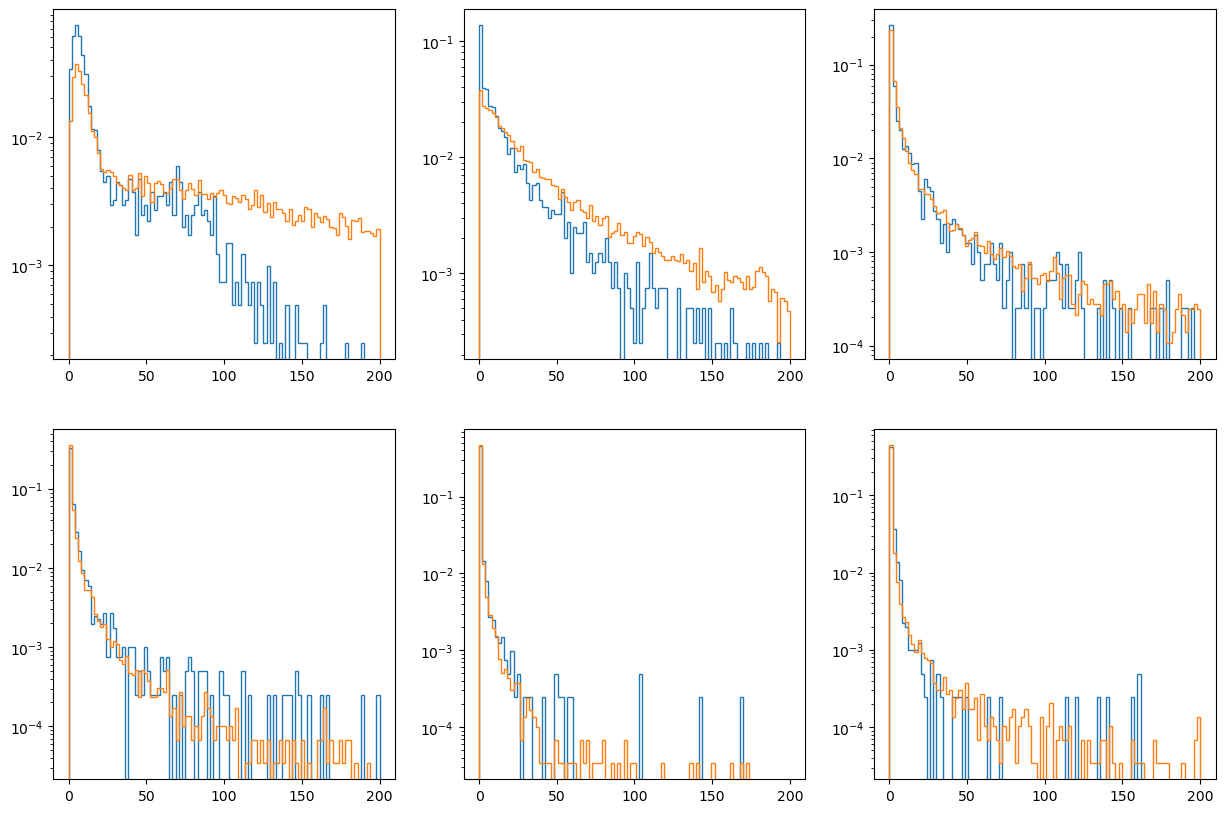

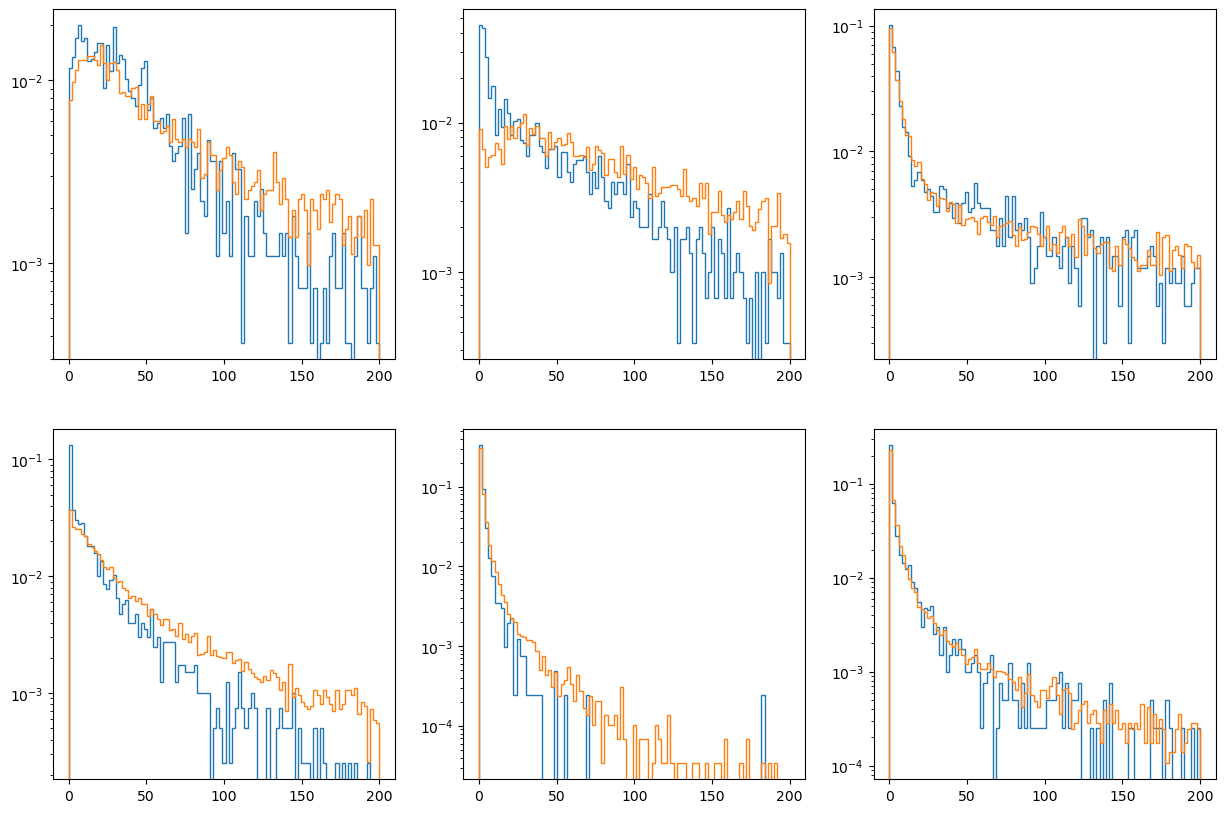

In [24]:
plt.figure(figsize=(15,10))
for i,q in enumerate(qs_sig):
    plt.subplot(2,3,i+1)
    bins = np.linspace(0,200,100)
    qb = qs_bkg[i]
    h1 = plt.hist(v.PFRelIso3*q,histtype='step',bins=bins,density=True)
    h2 = plt.hist(vb.PFRelIso3*qb,histtype='step',bins=bins,density=True)
    plt.yscale('log')
plt.figure(figsize=(15,10))
for i,q in enumerate(qs_sig):
    plt.subplot(2,3,i+1)
    bins = np.linspace(0,200,100)
    qb = qs_bkg[i]
    h1 = plt.hist(v.PFIso3*q,histtype='step',bins=bins,density=True)
    h2 = plt.hist(vb.PFIso3*qb,histtype='step',bins=bins,density=True)
    plt.yscale('log')

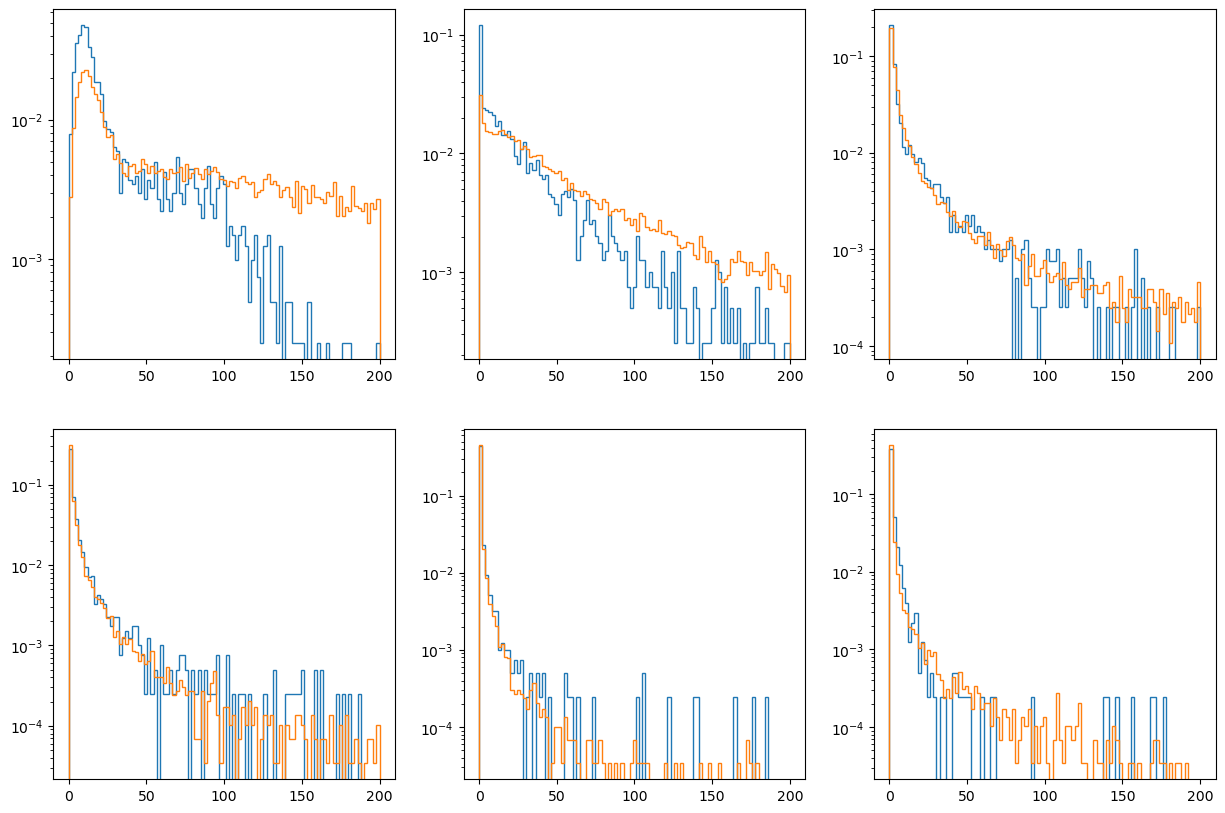

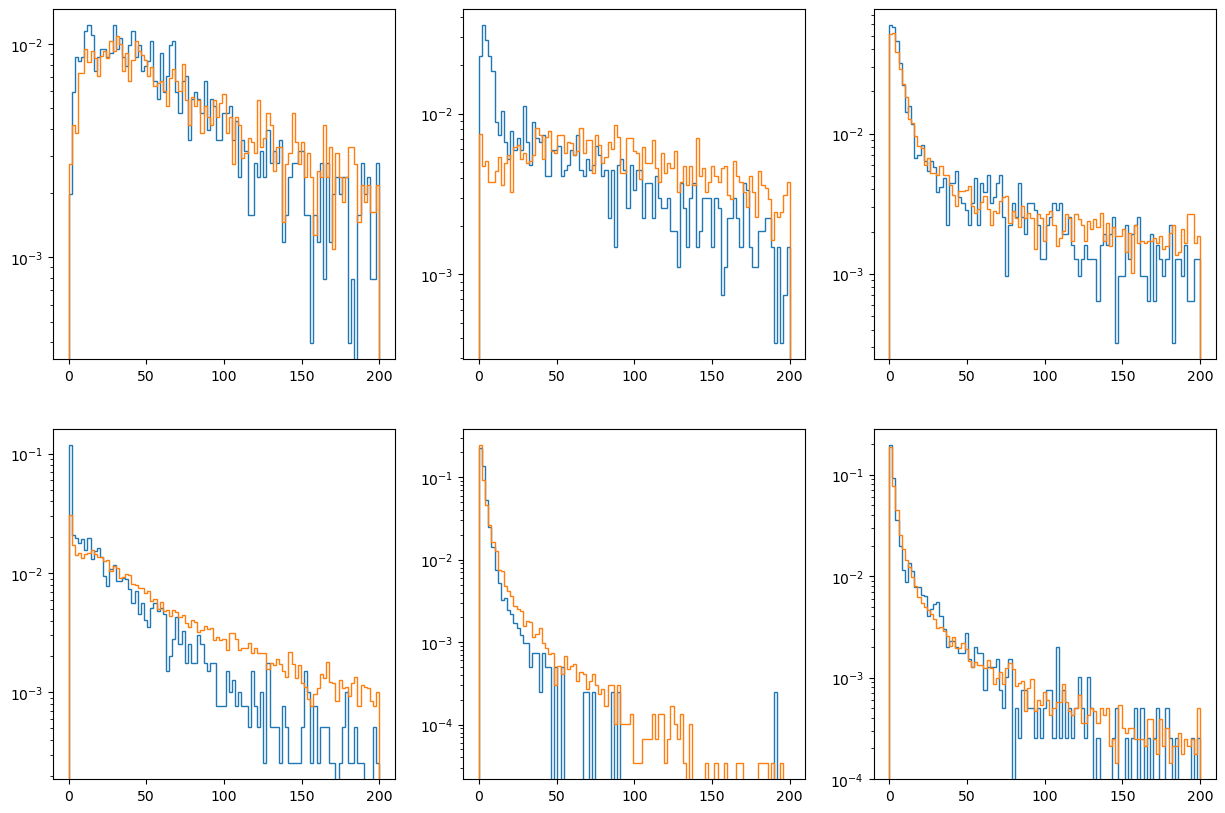

In [25]:
plt.figure(figsize=(15,10))
for i,q in enumerate(qs_sig):
    plt.subplot(2,3,i+1)
    bins = np.linspace(0,200,100)
    qb = qs_bkg[i]
    h1 = plt.hist(v.PFRelIso4*q,histtype='step',bins=bins,density=True)
    h2 = plt.hist(vb.PFRelIso4*qb,histtype='step',bins=bins,density=True)
    plt.yscale('log')
plt.figure(figsize=(15,10))
for i,q in enumerate(qs_sig):
    plt.subplot(2,3,i+1)
    bins = np.linspace(0,200,100)
    qb = qs_bkg[i]
    h1 = plt.hist(v.PFIso4*q,histtype='step',bins=bins,density=True)
    h2 = plt.hist(vb.PFIso4*qb,histtype='step',bins=bins,density=True)
    plt.yscale('log')

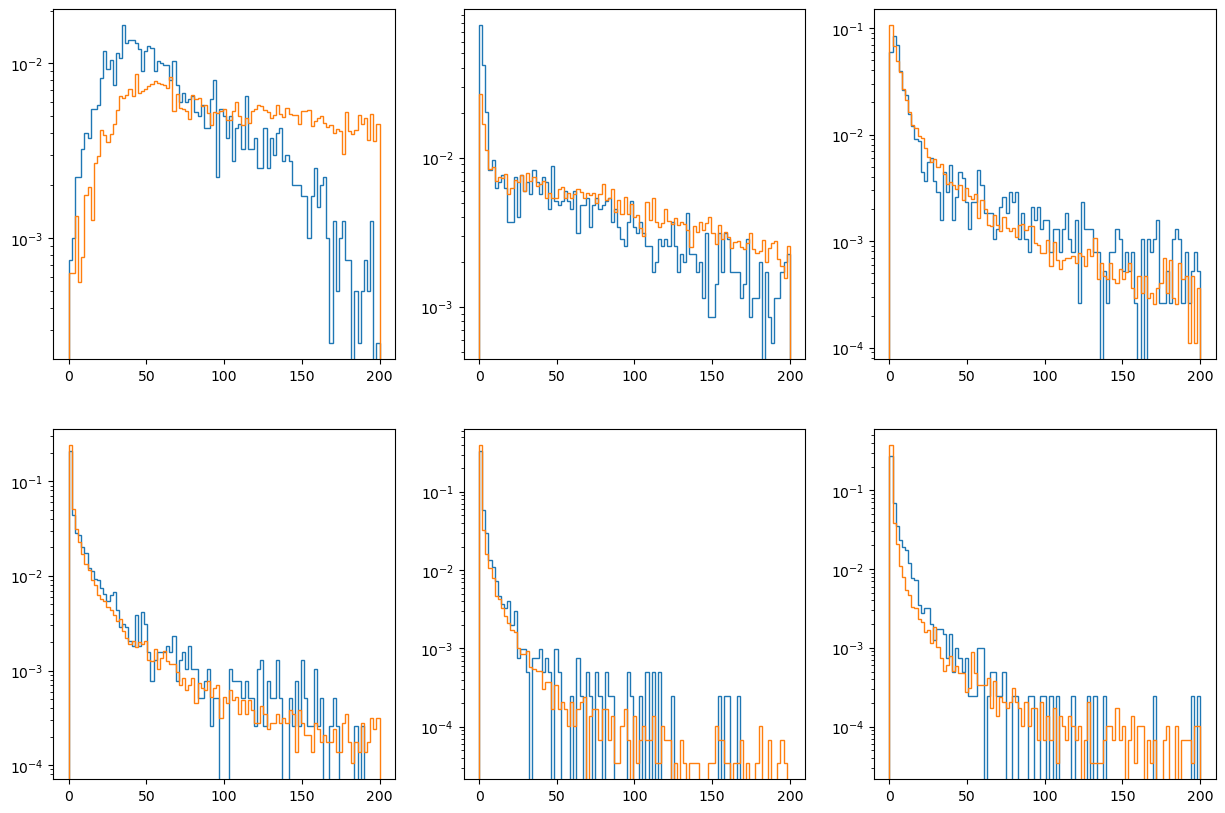

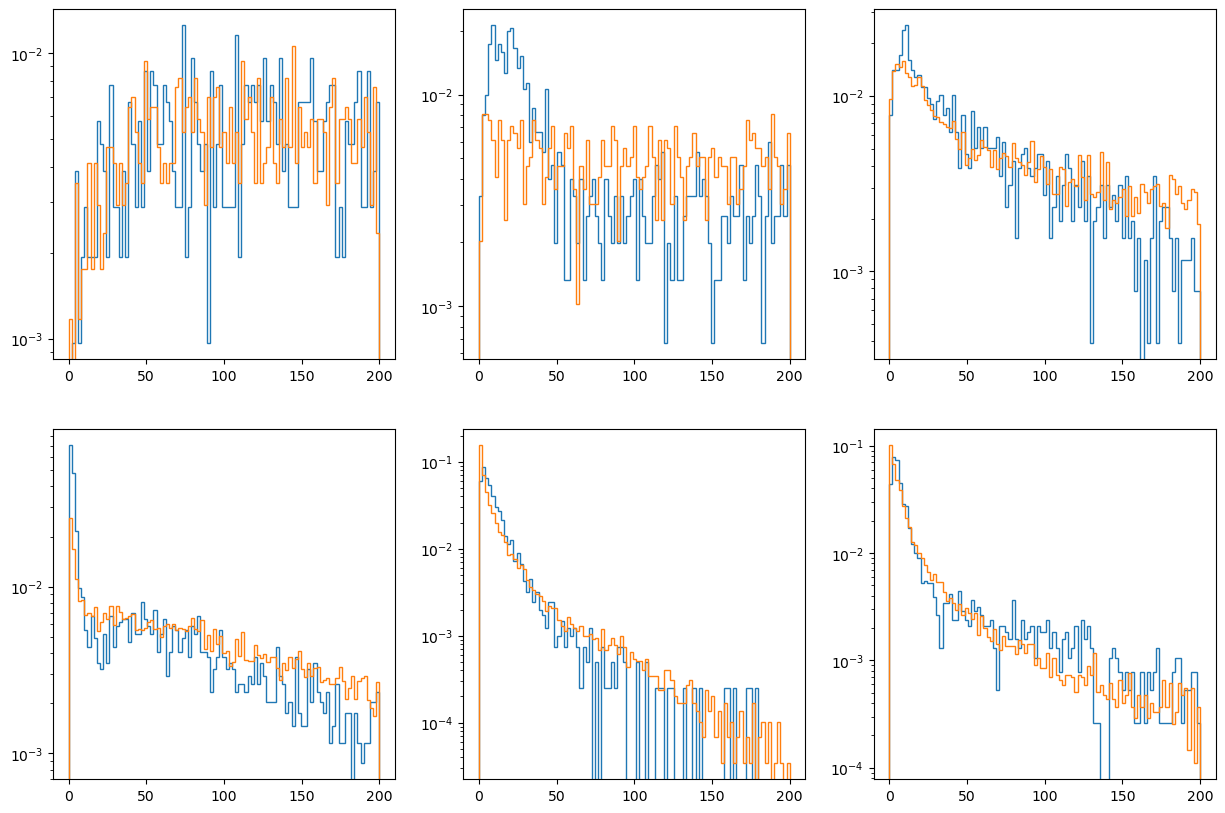

In [26]:
plt.figure(figsize=(15,10))
for i,q in enumerate(qs_sig):
    plt.subplot(2,3,i+1)
    bins = np.linspace(0,200,100)
    qb = qs_bkg[i]
    h1 = plt.hist(v.PFRelIso8*q,histtype='step',bins=bins,density=True)
    h2 = plt.hist(vb.PFRelIso8*qb,histtype='step',bins=bins,density=True)
    plt.yscale('log')
plt.figure(figsize=(15,10))
for i,q in enumerate(qs_sig):
    plt.subplot(2,3,i+1)
    bins = np.linspace(0,200,100)
    qb = qs_bkg[i]
    h1 = plt.hist(v.PFIso8*q,histtype='step',bins=bins,density=True)
    h2 = plt.hist(vb.PFIso8*qb,histtype='step',bins=bins,density=True)
    plt.yscale('log')